# Data preprocessing

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from gensim.models import word2vec

In [3]:
current_directory = os.getcwd()
print(current_directory)

c:\Users\seowoo kim\Desktop\노나없


In [4]:
# Japan first_read japan data
data_j = pd.read_csv("./intern_review_china_only_sentences.csv")
data_j.head()

,SeparatedSentences
0,Why even such a beautiful and successful woman...
1,It all depends on De Niro.The first half looke...
2,"For me, the world will be a better place if I ..."
3,When Hathaway intervened in Streep's strongwom...
4,It's been a long time since I've seen Princess...


# Preprocessing Strategy

1. Expand contractions : pycontractions
2. lowercase
3. change numbers to words : inflect
4. Remove Punctuations : '!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'
5. Remove remained emoji, japanese, chinese, korean words
6. PoS_tagging: from nltk import pos_tag
7. If needed, remove PRP, TO, DT, etc. 
8. Stemming: PorterStemmer
9. Find out average sentence length
10. Wordcloud


In [5]:
# Pycontractions doesn't work due to dependency issue. I just modulized it by myself.

from contractions import expand_contractions

contracted_list = []
Sentences = data_j['SeparatedSentences'].copy()

for sentence in Sentences:
    expanded_sentence = expand_contractions(sentence)
    contracted_list.append(expanded_sentence)


In [6]:
contracted_list[:5]

['Why even such a beautiful and successful woman in American movies has to accept such an ordinary and cheating husband?',
 "It all depends on De Niro.The first half looked good, the second half values swallowed conservative and retreated.De Niro's people are a little too perfect.",
 'For me, the world will be a better place if I can make one or two such warm skits every year that look good and release tears.。。。。',
 "When Hathaway intervened in Streep's strongwoman life, now De Niro anti-invasion Hathaway life……actually a little ambitious, trying to discuss career women and the older generation, but floating a bit.I like Hathaway a lot, but every little expression of her has a sense of rehearsal and release, especially compared to De Niro's relaxed share.And De Niro is really handsome...…………",
 'it is been a long time since i have seen Princess Anne, but the movie feels numb, especially after "Fashion Witch" has set the bar so high for professional women and young people, it is also to

In [7]:
# Transform all sentences into lower case! easy!

contracted_list = [text.lower() for text in contracted_list]

In [8]:
contracted_list[:5]

['why even such a beautiful and successful woman in american movies has to accept such an ordinary and cheating husband?',
 "it all depends on de niro.the first half looked good, the second half values swallowed conservative and retreated.de niro's people are a little too perfect.",
 'for me, the world will be a better place if i can make one or two such warm skits every year that look good and release tears.。。。。',
 "when hathaway intervened in streep's strongwoman life, now de niro anti-invasion hathaway life……actually a little ambitious, trying to discuss career women and the older generation, but floating a bit.i like hathaway a lot, but every little expression of her has a sense of rehearsal and release, especially compared to de niro's relaxed share.and de niro is really handsome...…………",
 'it is been a long time since i have seen princess anne, but the movie feels numb, especially after "fashion witch" has set the bar so high for professional women and young people, it is also to

In [9]:
# Change numbers into words
import inflect
p = inflect.engine()

def convert_number(text):
    def replace_number(match):
        number = match.group()
        return p.number_to_words(number)
    
    converted_text = re.sub(r'\d+', replace_number, text)
    return converted_text

inflected_list = []
inflected_list = [convert_number(text) for text in contracted_list]         

In [10]:
# Remove punctuations
rm_punctionations = inflected_list.copy()

def rm_punct(text):
    cleaned_text = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~]', ' ', text)
    return cleaned_text

rm_punctionations = [rm_punct(text) for text in rm_punctionations]

In [11]:
rm_punctionations

['why even such a beautiful and successful woman in american movies has to accept such an ordinary and cheating husband ',
 'it all depends on de niro the first half looked good  the second half values swallowed conservative and retreated de niro s people are a little too perfect ',
 'for me  the world will be a better place if i can make one or two such warm skits every year that look good and release tears 。。。。',
 'when hathaway intervened in streep s strongwoman life  now de niro anti invasion hathaway life……actually a little ambitious  trying to discuss career women and the older generation  but floating a bit i like hathaway a lot  but every little expression of her has a sense of rehearsal and release  especially compared to de niro s relaxed share and de niro is really handsome   …………',
 'it is been a long time since i have seen princess anne  but the movie feels numb  especially after  fashion witch  has set the bar so high for professional women and young people  it is also to

In [12]:
# remove japanese, korean, chinese words

def only_english(text):
    cleaned_text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    return cleaned_text

rm_punctionations = [only_english(text) for text in rm_punctionations]

In [13]:
# POS_tagging

import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# 필요한 NLTK 데이터 다운로드
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Text를 단어 토큰과 POS 태그로 변환
def pos_tagging(text):
    word_tokens = word_tokenize(text)
    return pos_tag(word_tokens)

tag_sentence = rm_punctionations.copy()

tag_sentence = [pos_tagging(text) for text in tag_sentence]


[nltk_data] Downloading package punkt to C:\Users\seowoo
[nltk_data]     kim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\seowoo kim\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [14]:
tag_sentence

[[('why', 'WRB'),
  ('even', 'RB'),
  ('such', 'PDT'),
  ('a', 'DT'),
  ('beautiful', 'NN'),
  ('and', 'CC'),
  ('successful', 'JJ'),
  ('woman', 'NN'),
  ('in', 'IN'),
  ('american', 'JJ'),
  ('movies', 'NNS'),
  ('has', 'VBZ'),
  ('to', 'TO'),
  ('accept', 'VB'),
  ('such', 'PDT'),
  ('an', 'DT'),
  ('ordinary', 'JJ'),
  ('and', 'CC'),
  ('cheating', 'JJ'),
  ('husband', 'NN')],
 [('it', 'PRP'),
  ('all', 'DT'),
  ('depends', 'VBZ'),
  ('on', 'IN'),
  ('de', 'IN'),
  ('niro', 'FW'),
  ('the', 'DT'),
  ('first', 'JJ'),
  ('half', 'NN'),
  ('looked', 'VBD'),
  ('good', 'JJ'),
  ('the', 'DT'),
  ('second', 'JJ'),
  ('half', 'NN'),
  ('values', 'NNS'),
  ('swallowed', 'VBN'),
  ('conservative', 'JJ'),
  ('and', 'CC'),
  ('retreated', 'VBD'),
  ('de', 'FW'),
  ('niro', 'FW'),
  ('s', 'JJ'),
  ('people', 'NNS'),
  ('are', 'VBP'),
  ('a', 'DT'),
  ('little', 'JJ'),
  ('too', 'RB'),
  ('perfect', 'JJ')],
 [('for', 'IN'),
  ('me', 'PRP'),
  ('the', 'DT'),
  ('world', 'NN'),
  ('will', 'MD'),


In [17]:
nltk.download('tagsets')
nltk.help.upenn_tagset('WRB')

WRB: Wh-adverb
    how however whence whenever where whereby whereever wherein whereof why


[nltk_data] Downloading package tagsets to C:\Users\seowoo
[nltk_data]     kim\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [18]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Remove IN, PRP, CC, PRP$, DT, TO, FW, WP
def remove_specific_tags(tagged_sentence, tags_to_remove):
    return [word for word, tag in tagged_sentence if tag not in tags_to_remove]

tags_to_remove = {"IN", "PRP", "CC", "PRP$", "DT", "TO", "FW", "WP", "WRB"}

tag_rm = tag_sentence.copy()
tag_rm = [remove_specific_tags(text, tags_to_remove) for text in tag_rm]

In [19]:
tag_rm_sentence = [pos_tag(sentence) for sentence in tag_rm]
tag_rm_sentence[:5]

[[('even', 'RB'),
  ('such', 'JJ'),
  ('beautiful', 'JJ'),
  ('successful', 'JJ'),
  ('woman', 'NN'),
  ('american', 'JJ'),
  ('movies', 'NNS'),
  ('has', 'VBZ'),
  ('accept', 'NNS'),
  ('such', 'JJ'),
  ('ordinary', 'JJ'),
  ('cheating', 'NN'),
  ('husband', 'NN')],
 [('depends', 'NNS'),
  ('first', 'JJ'),
  ('half', 'NN'),
  ('looked', 'VBD'),
  ('good', 'JJ'),
  ('second', 'JJ'),
  ('half', 'NN'),
  ('values', 'NNS'),
  ('swallowed', 'VBD'),
  ('conservative', 'JJ'),
  ('retreated', 'JJ'),
  ('s', 'NN'),
  ('people', 'NNS'),
  ('are', 'VBP'),
  ('little', 'JJ'),
  ('too', 'RB'),
  ('perfect', 'JJ')],
 [('world', 'NN'),
  ('will', 'MD'),
  ('be', 'VB'),
  ('better', 'JJR'),
  ('place', 'NN'),
  ('i', 'NN'),
  ('can', 'MD'),
  ('make', 'VB'),
  ('one', 'CD'),
  ('two', 'CD'),
  ('such', 'JJ'),
  ('warm', 'JJ'),
  ('skits', 'NNS'),
  ('year', 'NN'),
  ('look', 'VBP'),
  ('good', 'JJ'),
  ('release', 'NN'),
  ('tears', 'NNS')],
 [('hathaway', 'NN'),
  ('intervened', 'VBD'),
  ('streep',

In [20]:
# Lemmatize & remove stopwords

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import wordnet as wn

nltk.download('wordnet')

# inflect engine initialize
p = inflect.engine()

# WordNetLemmatizer initialize
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wn.ADJ
    elif treebank_tag.startswith('V'):
        return wn.VERB
    elif treebank_tag.startswith('N'):
        return wn.NOUN
    elif treebank_tag.startswith('R'):
        return wn.ADV
    else:
        return None

def singularize_and_lemmatize(tagged_words):
    new_words = []
    
    for word, tag in tagged_words:
        if tag.startswith('N'):
            singular_word = p.singular_noun(word)
            if singular_word:
                new_words.append(singular_word)
            else:
                new_words.append(word)
        else:
            wn_tag = get_wordnet_pos(tag)
            if wn_tag is not None:
                lemma_word = lemmatizer.lemmatize(word, wn_tag)
                new_words.append(lemma_word)
            else:
                new_words.append(word)
    
    return new_words

[nltk_data] Downloading package wordnet to C:\Users\seowoo
[nltk_data]     kim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
processed_sentences = [singularize_and_lemmatize(sentence) for sentence in tag_rm_sentence]

In [22]:
processed_sentences

[['even',
  'such',
  'beautiful',
  'successful',
  'woman',
  'american',
  'movie',
  'have',
  'accept',
  'such',
  'ordinary',
  'cheating',
  'husband'],
 ['depend',
  'first',
  'half',
  'look',
  'good',
  'second',
  'half',
  'value',
  'swallow',
  'conservative',
  'retreated',
  's',
  'person',
  'be',
  'little',
  'too',
  'perfect'],
 ['world',
  'will',
  'be',
  'good',
  'place',
  'i',
  'can',
  'make',
  'one',
  'two',
  'such',
  'warm',
  'skit',
  'year',
  'look',
  'good',
  'release',
  'tear'],
 ['hathaway',
  'intervene',
  'streep',
  's',
  'strongwoman',
  'life',
  'now',
  'de',
  'anti',
  'invasion',
  'hathaway',
  'life',
  'actually',
  'little',
  'ambitious',
  'try',
  'discuss',
  'career',
  'woman',
  'old',
  'generation',
  'float',
  'bit',
  'i',
  'hathaway',
  'lot',
  'little',
  'expression',
  'have',
  'sense',
  'rehearsal',
  'release',
  'especially',
  'compare',
  'de',
  'share',
  'de',
  'be',
  'really',
  'handsome']

In [23]:
# stopwords
def remove_verbs(words):
    verbs_to_remove = {"am", "be", "are", "was", "were", "being", "is"}
    filtered_words = [word for word in words if word not in verbs_to_remove]
    return filtered_words

processed_sentences_no_stopwords = [remove_verbs(word) for word in processed_sentences]

In [24]:
processed_sentences_no_stopwords

[['even',
  'such',
  'beautiful',
  'successful',
  'woman',
  'american',
  'movie',
  'have',
  'accept',
  'such',
  'ordinary',
  'cheating',
  'husband'],
 ['depend',
  'first',
  'half',
  'look',
  'good',
  'second',
  'half',
  'value',
  'swallow',
  'conservative',
  'retreated',
  's',
  'person',
  'little',
  'too',
  'perfect'],
 ['world',
  'will',
  'good',
  'place',
  'i',
  'can',
  'make',
  'one',
  'two',
  'such',
  'warm',
  'skit',
  'year',
  'look',
  'good',
  'release',
  'tear'],
 ['hathaway',
  'intervene',
  'streep',
  's',
  'strongwoman',
  'life',
  'now',
  'de',
  'anti',
  'invasion',
  'hathaway',
  'life',
  'actually',
  'little',
  'ambitious',
  'try',
  'discuss',
  'career',
  'woman',
  'old',
  'generation',
  'float',
  'bit',
  'i',
  'hathaway',
  'lot',
  'little',
  'expression',
  'have',
  'sense',
  'rehearsal',
  'release',
  'especially',
  'compare',
  'de',
  'share',
  'de',
  'really',
  'handsome'],
 ['long',
  'time',
  

In [25]:
# final..refine!

def replace_words(sentence):
    replacements = {
        r'\binternben\b': ['intern', 'ben'],
        r'\bexperiencesben\b': ['experience', 'ben'],
        r'\bbeingben\b': ['being', 'ben'],
        r'\bbentwo\b': ['ben', 'two'],
        r'\bbens\b': ['ben'],
        r'\bitben\b': ['it', 'ben'],
        r'\bheartben\b': ['heart', 'ben'],
        r'\botherben\b': ['other', 'ben'],
        r'\bbentheir\b': ['ben', 'their'],
        r'\bfamilyben\b': ['family', 'ben'],
        r'\bfunben\b': ['fun', 'ben'],
        r'\binternrobert\b': ['intern', 'robert'],
        r'\buprobert\b': ['up', 'robert'],
        r'\brealisticrobert\b': ['realistic', 'robert'],
        r'\btemperrobert\b': ['temper', 'robert'],
        r'\bplacerobert\b': ['place', 'robert'],
        r'\btimesrobert\b': ['time', 'robert'],
        r'\bniros\b': ['niro'],
        r'\bdeniro\b': ['niro'],
        r'\bniroi\b': ['niro', 'I'],
        r'\bmyershe\b': ['she'],
        r'\bmyersworking\b': ['working'],
        r'\banhathaway\b': ['hathaway'],
        r'\bsceneanhathaway\b': ['scene', 'hathaway'],
        r'\banhathawayhis\b': ['hathaway', 'his'],
        r'\bhathawayde\b': ['hathaway', 'de'],
        r'\bhathaways\b': ['hathaway'],
        r'\banhathaways\b': ['hathaway'],
        r'\brottenanhathaway\b': ['rotten', 'hathaway'],
        r'\btherejules\b': ['there', 'jule'],
        r'\bweakjule\b': ['weak', 'jule'],
        r'\bjules\b': ['jule'],
        r'\broutinejule\b': ['routine', 'jule'],
        r'\bagejule\b': ['age', 'jule'],
    }
    for pattern, replacement in replacements.items():
        sentence = re.sub(pattern, ' '.join(replacement), sentence)

    return sentence.split()

modified_sentences = [replace_words(' '.join(sentence)) for sentence in processed_sentences_no_stopwords]

In [26]:
modified_sentences

[['even',
  'such',
  'beautiful',
  'successful',
  'woman',
  'american',
  'movie',
  'have',
  'accept',
  'such',
  'ordinary',
  'cheating',
  'husband'],
 ['depend',
  'first',
  'half',
  'look',
  'good',
  'second',
  'half',
  'value',
  'swallow',
  'conservative',
  'retreated',
  's',
  'person',
  'little',
  'too',
  'perfect'],
 ['world',
  'will',
  'good',
  'place',
  'i',
  'can',
  'make',
  'one',
  'two',
  'such',
  'warm',
  'skit',
  'year',
  'look',
  'good',
  'release',
  'tear'],
 ['hathaway',
  'intervene',
  'streep',
  's',
  'strongwoman',
  'life',
  'now',
  'de',
  'anti',
  'invasion',
  'hathaway',
  'life',
  'actually',
  'little',
  'ambitious',
  'try',
  'discuss',
  'career',
  'woman',
  'old',
  'generation',
  'float',
  'bit',
  'i',
  'hathaway',
  'lot',
  'little',
  'expression',
  'have',
  'sense',
  'rehearsal',
  'release',
  'especially',
  'compare',
  'de',
  'share',
  'de',
  'really',
  'handsome'],
 ['long',
  'time',
  

In [27]:
# remove empty list
modified_sentences = [sentence for sentence in modified_sentences if sentence]

In [28]:
lengths = [len(sentence) for sentence in modified_sentences]

# sentence lenths discriptive analysis
median = np.median(lengths)
mean = np.mean(lengths)
percentile_75 = np.percentile(lengths, 75)
percentile_90 = np.percentile(lengths, 90)
percentile_95 = np.percentile(lengths, 95)

print ('median: ', median, 
       'mean: ', mean, 
       'per_75: ', percentile_75, 
       'per_90: ', percentile_90, 
       'per_95: ', percentile_95)

median:  12.0 mean:  16.64184978681535 per_75:  26.0 per_90:  39.0 per_95:  46.0


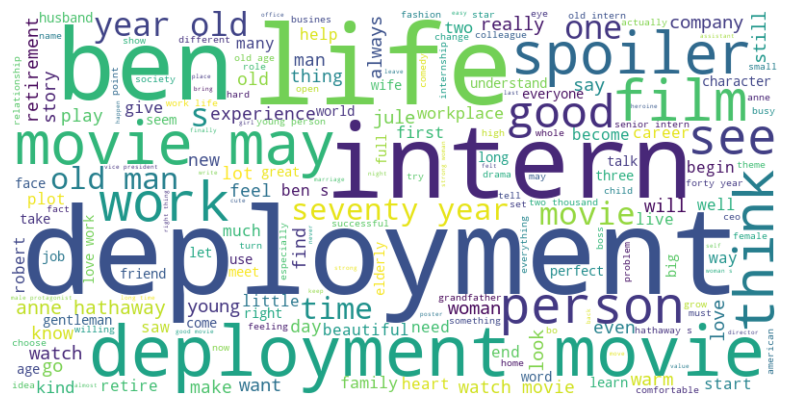

In [29]:
#wordcloud
from wordcloud import WordCloud
text_data_japan = " ".join([" ".join(sentence) for sentence in modified_sentences])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data_japan)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [30]:
from collections import Counter
all_words = [word for sentence in modified_sentences for word in sentence]
word_freq= Counter(all_words)
print(word_freq)

Counter({'i': 1568, 'movie': 1177, 'have': 1165, 'deployment': 938, 'not': 927, 'old': 780, 'do': 612, 'life': 579, 's': 569, 'intern': 531, 'ben': 489, 'year': 461, 'work': 443, 'person': 425, 'may': 394, 'can': 386, 'man': 384, 'spoiler': 351, 'film': 337, 'good': 309, 'see': 303, 'think': 296, 'very': 293, 'hathaway': 289, 'time': 288, 'woman': 287, 'seventy': 272, 'watch': 271, 'love': 269, 'one': 264, 'anne': 248, 'company': 243, 'there': 241, 'so': 234, 'thing': 225, 'young': 219, 'two': 214, 'really': 214, 'go': 211, 'first': 205, 'will': 202, 'say': 201, 'also': 194, 'jule': 191, 'new': 191, 'want': 185, 'still': 177, 'more': 172, 'story': 172, 'warm': 171, 'experience': 171, 'just': 169, 'look': 164, 'always': 161, 'feel': 160, 'make': 155, 'too': 151, 'up': 150, 'age': 143, 'workplace': 136, 'robert': 136, 'family': 134, 'find': 133, 'that': 131, 'play': 130, 'get': 129, 'female': 128, 'saw': 124, 'other': 123, 'most': 121, 'day': 121, 'retirement': 121, 'know': 118, 'only': 

In [31]:
df_word_freq = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])
df_word_freq.sort_values(by='Frequency', ascending=False, inplace=True)
df_word_freq

,Word,Frequency
30,i,1568
6,movie,1177
7,have,1165
1407,deployment,938
88,not,927
...,...,...
2691,utopian,1
2690,inauthenticity,1
2689,overly,1
2688,thoroughly,1


In [32]:
! pip install openpyxl
df_word_freq.to_excel('word_freq_china.xlsx')


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# word2Vec

In [33]:
from gensim.models import Word2Vec

In [34]:
model = Word2Vec(sentences=modified_sentences, vector_size=100, window=40, min_count=2, workers=1)

In [35]:
model.save("word2vec_china.model")

In [36]:
word_vectors = model.wv

In [37]:
similar_words = word_vectors.most_similar('intern')
print(similar_words)

[('story', 0.999578595161438), ('company', 0.9995533227920532), ('internet', 0.9995458126068115), ('jule', 0.9995185136795044), ('ben', 0.9995002746582031), ('new', 0.999448299407959), ('s', 0.9994390606880188), ('president', 0.9993955492973328), ('retire', 0.9993798732757568), ('man', 0.9993698596954346)]


In [38]:
similar_words_100 = word_vectors.most_similar('age', topn=100)
print("Top 100 similar words:", similar_words_100)


Top 100 similar words: [('gentleman', 0.9998363852500916), ('most', 0.9997977018356323), ('learn', 0.9997840523719788), ('begin', 0.9997739791870117), ('play', 0.9997727870941162), ('use', 0.999756932258606), ('help', 0.9997566342353821), ('problem', 0.9997540712356567), ('also', 0.9997491836547852), ('alone', 0.9997488856315613), ('person', 0.9997395277023315), ('other', 0.9997338056564331), ('busy', 0.9997310638427734), ('day', 0.9997265338897705), ('fashion', 0.9997220039367676), ('choose', 0.9997186064720154), ('go', 0.9997185468673706), ('internship', 0.9997182488441467), ('give', 0.9997135400772095), ('job', 0.9997069239616394), ('attitude', 0.9997029304504395), ('twenty', 0.9997023344039917), ('there', 0.9996997117996216), ('retirement', 0.9996967315673828), ('experience', 0.9996958374977112), ('become', 0.9996944665908813), ('let', 0.9996920228004456), ('own', 0.9996898770332336), ('come', 0.9996897578239441), ('busines', 0.9996895790100098), ('start', 0.9996885061264038), ('kn